In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import warnings 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from dython import nominal

In [2]:
data = pd.read_csv('model_dat.csv')
data

,Brand,Year,Horsepower,Engine Cylinders,Number of Doors,Price
0,BMW,2011,335,6,2,46135
1,BMW,2011,300,6,2,40650
2,BMW,2011,300,6,2,36350
3,BMW,2011,230,6,2,29450
4,BMW,2011,230,6,2,34500
...,...,...,...,...,...,...
9841,Acura,2012,300,6,4,46120
9842,Acura,2012,300,6,4,56670
9843,Acura,2012,300,6,4,50620
9844,Acura,2013,300,6,4,50920


In [3]:
# Treating all the nominal variables at once using dummy variables
data_Numeric=data
data_Numeric.columns

Index(['Brand', 'Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors',
       'Price'],
      dtype='object')

In [4]:
TargetVariable='Price'
Predictors=['Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors',
       'Brand_Acura', 'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW',
       'Brand_Buick', 'Brand_Cadillac', 'Brand_Chevrolet', 'Brand_Chrysler',
       'Brand_Dodge', 'Brand_FIAT', 'Brand_Ford', 'Brand_GMC', 'Brand_Genesis',
       'Brand_HUMMER', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lincoln',
       'Brand_Lotus', 'Brand_Maserati', 'Brand_Mazda', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Oldsmobile',
       'Brand_Plymouth', 'Brand_Pontiac', 'Brand_Porsche', 'Brand_Saab',
       'Brand_Scion', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo']
data_Numeric=pd.get_dummies(data)
X=data_Numeric[Predictors].values
y=data_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeRegressor(max_depth = 10)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
#f, axes = plt.subplots(1, 2, figsize=(12, 4))
#sb.heatmap(confusion_matrix(y_train, y_train_pred),
#           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
#sb.heatmap(confusion_matrix(y_test, y_test_pred), 
#           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9078265351208438

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9033632797115032



[Text(0.431841901240458, 0.9545454545454546, 'Year <= 2000.5\nsquared_error = 253606146.184\nsamples = 7876\nvalue = 29482.669'),
 Text(0.23158695133587787, 0.8636363636363636, 'Brand_Land Rover <= 0.5\nsquared_error = 4864788.276\nsamples = 1068\nvalue = 2599.148'),
 Text(0.1902731393129771, 0.7727272727272727, 'Horsepower <= 281.0\nsquared_error = 2247869.759\nsamples = 1064\nvalue = 2514.3'),
 Text(0.1280415076335878, 0.6818181818181818, 'Horsepower <= 217.5\nsquared_error = 1047042.56\nsamples = 1015\nvalue = 2359.959'),
 Text(0.07287690839694656, 0.5909090909090909, 'Year <= 1996.5\nsquared_error = 242945.086\nsamples = 850\nvalue = 2223.092'),
 Text(0.03554389312977099, 0.5, 'Brand_Toyota <= 0.5\nsquared_error = 34135.913\nsamples = 550\nvalue = 2053.678'),
 Text(0.02051526717557252, 0.4090909090909091, 'Brand_Porsche <= 0.5\nsquared_error = 27201.653\nsamples = 506\nvalue = 2037.332'),
 Text(0.01431297709923664, 0.3181818181818182, 'Brand_Nissan <= 0.5\nsquared_error = 24489.668

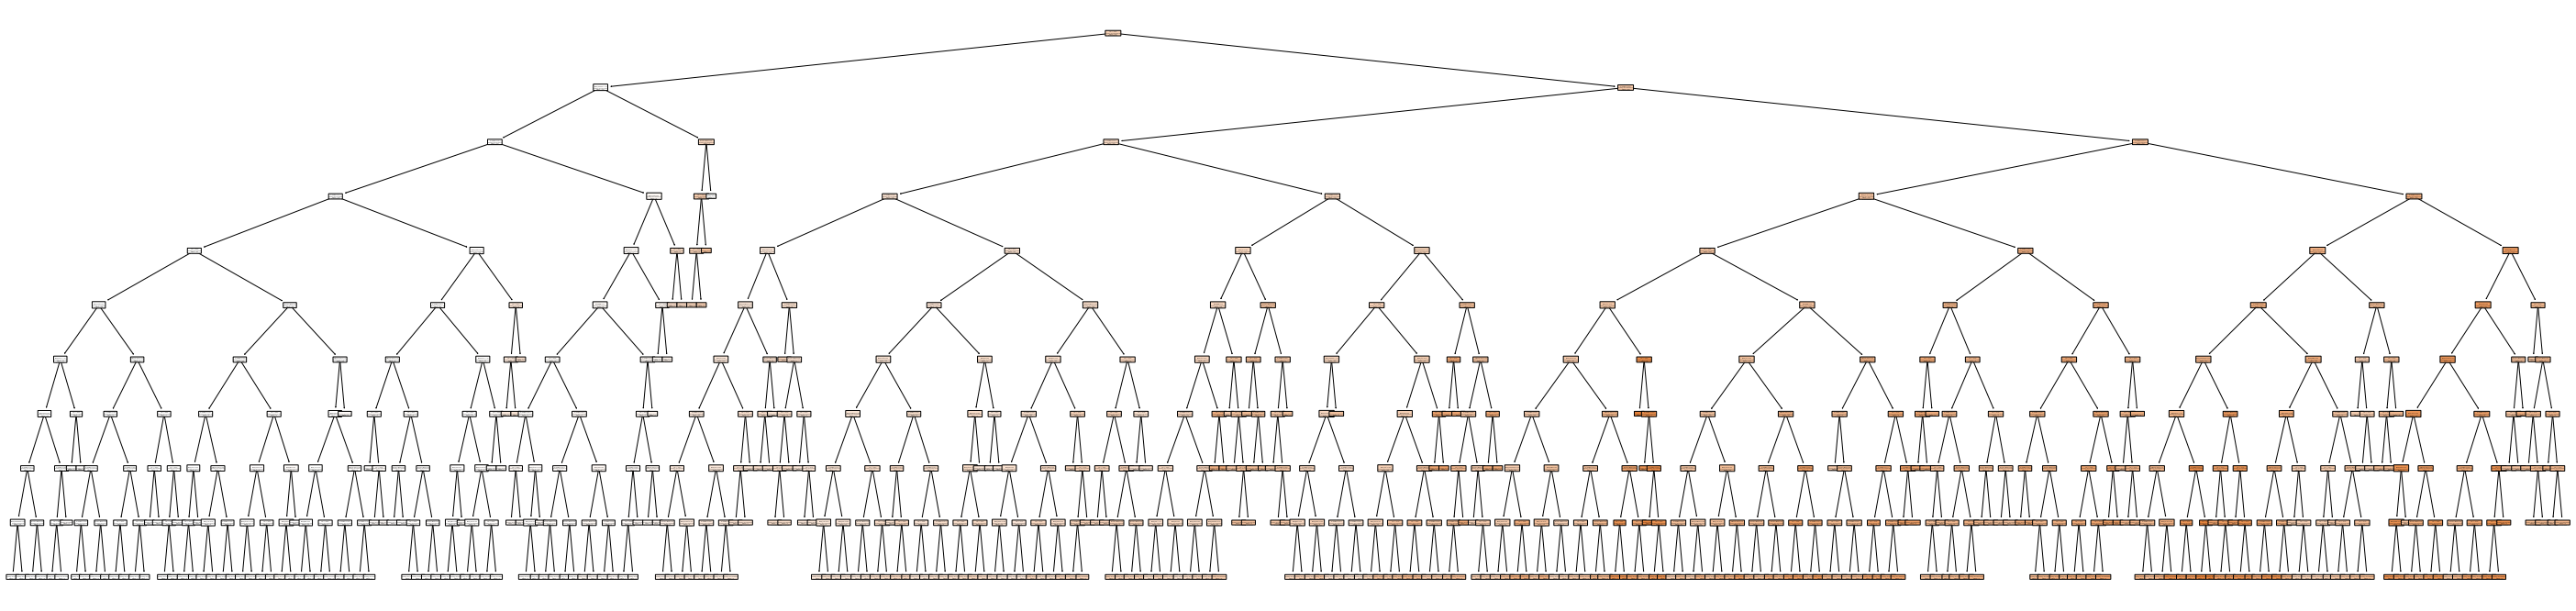

In [6]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(50,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names = Predictors, 
         class_names = TargetVariable)

In [7]:
# Print the Classification Accuracy

print("R2 \t:", dectree.score(X_train, y_train))
print("R2 \t:", dectree.score(X_test, y_test))

R2 	: 0.9078265351208438
R2 	: 0.9033632797115032
